In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [3]:
data = pd.read_csv(r'/Users/leo/Downloads/BTCUSD_241227-bookTicker-2024-09-01.csv', sep=",")
data.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,1022033143275,60352.2,61.0,60358.5,7.0,1725148803813,1725148803823
1,1022033143540,60352.2,60.0,60358.5,7.0,1725148803820,1725148803827
2,1022033143684,60352.3,1.0,60358.5,7.0,1725148803822,1725148803830
3,1022033146373,60352.3,1.0,60358.4,95.0,1725148803903,1725148803912
4,1022033146703,60352.3,1.0,60352.4,6.0,1725148803910,1725148803918


In [4]:
perp = pd.read_csv(r'/Users/leo/Downloads/BTCUSD_PERP-bookTicker-2024-09-01.csv', sep=",")
perp.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,1022033035827,58939.9,565.0,58940.0,3406.0,1725148800013,1725148800028
1,1022033035850,58939.9,565.0,58940.0,3414.0,1725148800015,1725148800028
2,1022033035862,58939.9,565.0,58940.0,3424.0,1725148800015,1725148800028
3,1022033124897,58939.9,565.0,58940.0,3423.0,1725148800215,1725148800340
4,1022033124963,58939.9,415.0,58940.0,3423.0,1725148800215,1725148800341


In [5]:
def timestampInTime(timesamps: pd.Series):
    datetime_ = timesamps.apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
    return datetime_

def deltaDateTime(datetime_):
    deltaTime = datetime_.diff().dt.total_seconds()
    return deltaTime

In [6]:
perp_date = timestampInTime(perp.transaction_time)
delta_perp = deltaDateTime(perp_date)
delta_perp

0            NaN
1          0.002
2          0.000
3          0.200
4          0.000
           ...  
3924725    0.010
3924726    0.000
3924727    0.220
3924728    0.008
3924729    0.000
Name: transaction_time, Length: 3924730, dtype: float64

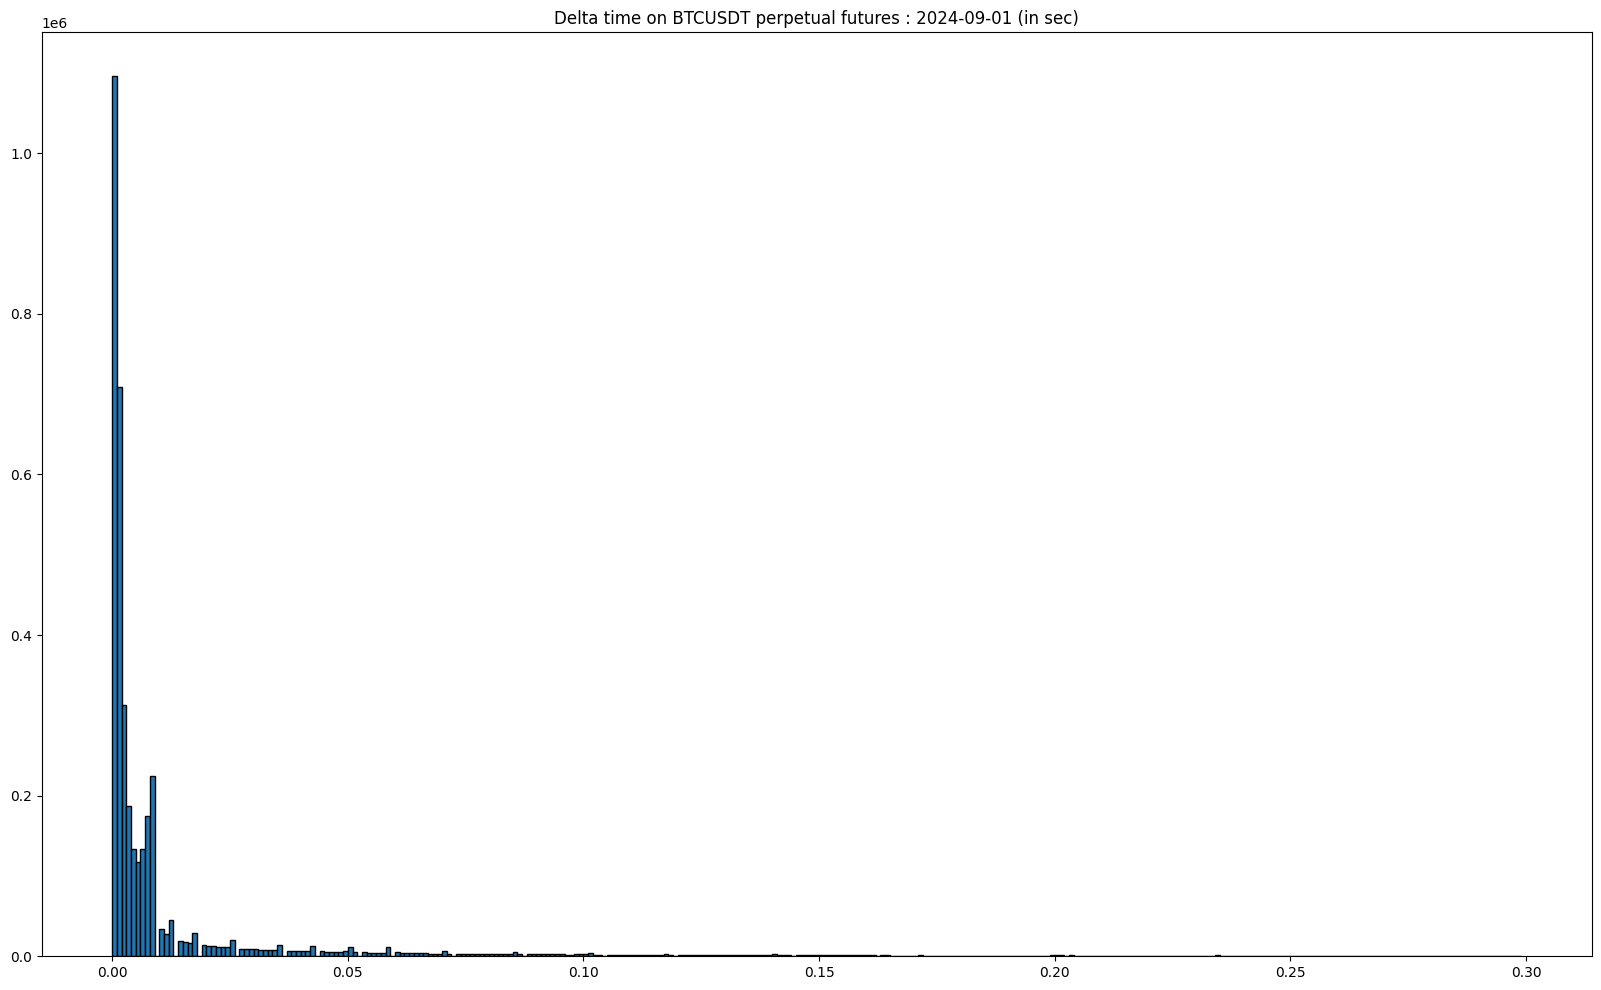

In [7]:
plt.figure(figsize=(20,12))
plt.hist(delta_perp, bins=np.arange(0, 0.3, 0.001), ec="k")
plt.title("Delta time on BTCUSDT perpetual futures : 2024-09-01 (in sec)")
plt.show()

In [8]:
s_date = timestampInTime(data.transaction_time)
delta_s = deltaDateTime(s_date)
delta_s

0           NaN
1         0.007
2         0.002
3         0.081
4         0.007
          ...  
654354    0.006
654355    0.002
654356    0.000
654357    0.214
654358    0.006
Name: transaction_time, Length: 654359, dtype: float64

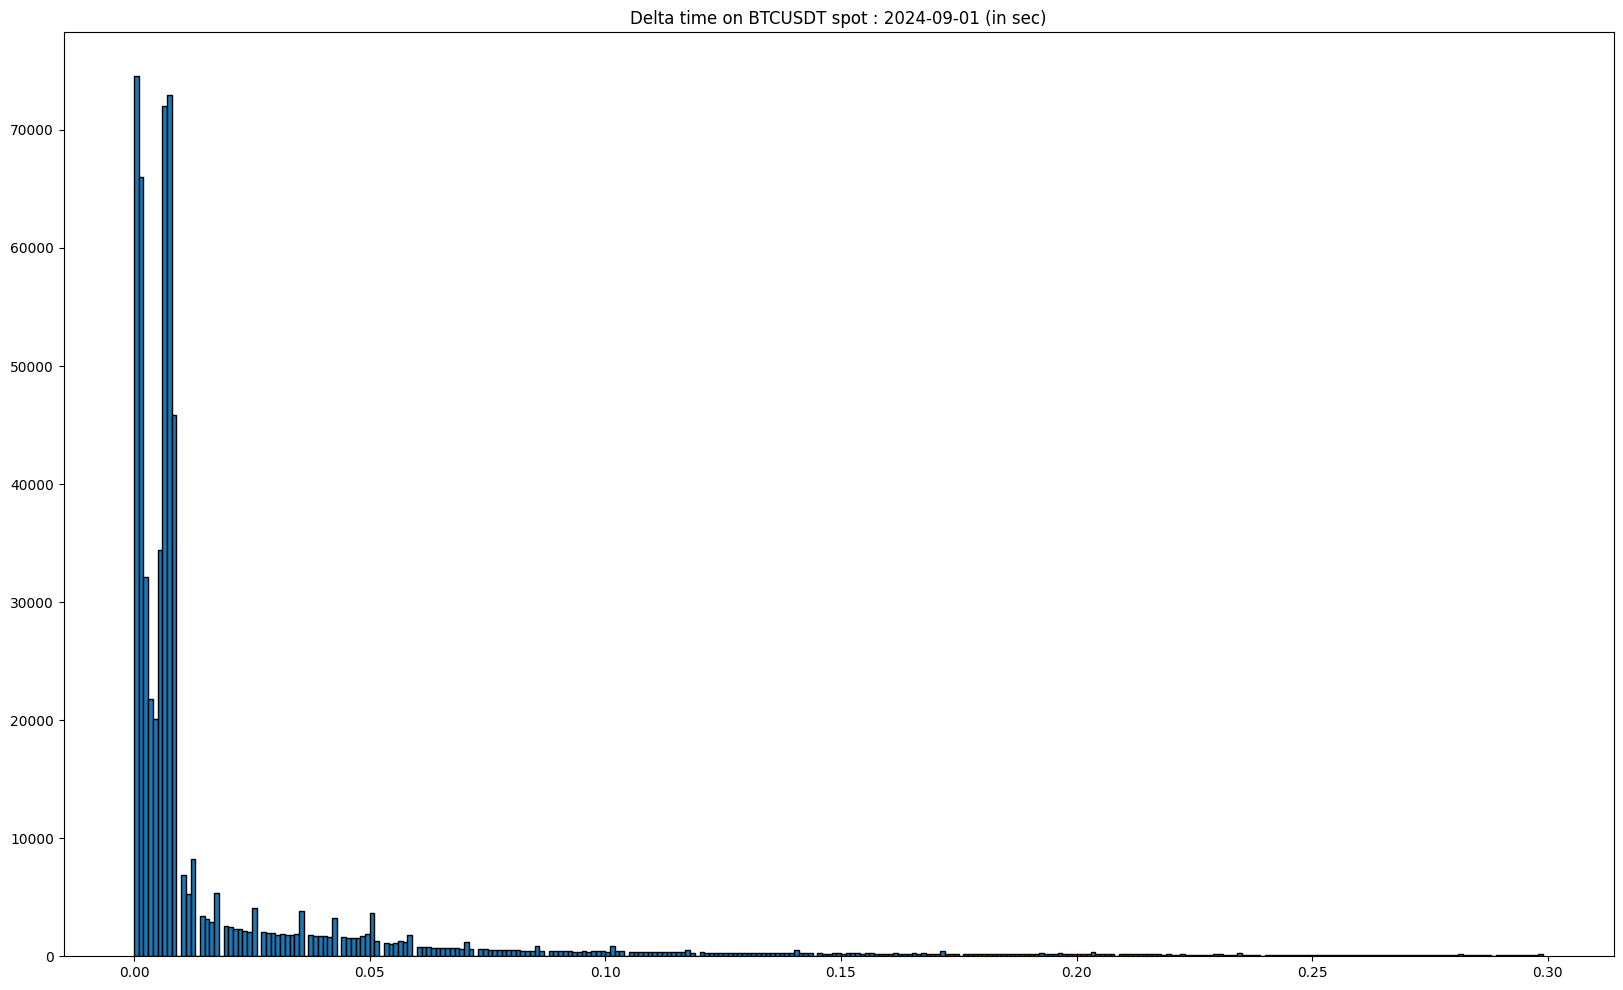

In [9]:
plt.figure(figsize=(20,12))
plt.hist(delta_s, bins=np.arange(0, 0.3, 0.001), ec="k")
plt.title("Delta time on BTCUSDT spot : 2024-09-01 (in sec)")
plt.show()

In [10]:
dirty_data = pd.read_csv(r'/Users/leo/Downloads/BTCUSD_250328-bookTicker-2024-09-27 2.csv', sep=",")

In [11]:
dirty_data.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,1037925946377,0.0,0.0,78498.5,161714.0,1727424482695,1727424482702
1,1037925946393,58020.6,163675.0,78498.5,161714.0,1727424482697,1727424482707
2,1037925946719,25804.6,307518.0,78498.5,161714.0,1727424482733,1727424482745
3,1037925946723,25804.6,307518.0,98767.1,221361.0,1727424482733,1727424482745
4,1037925946724,25804.6,307518.0,0.0,0.0,1727424482733,1727424482745


In [12]:
dateTimeDirty = timestampInTime(dirty_data.transaction_time)

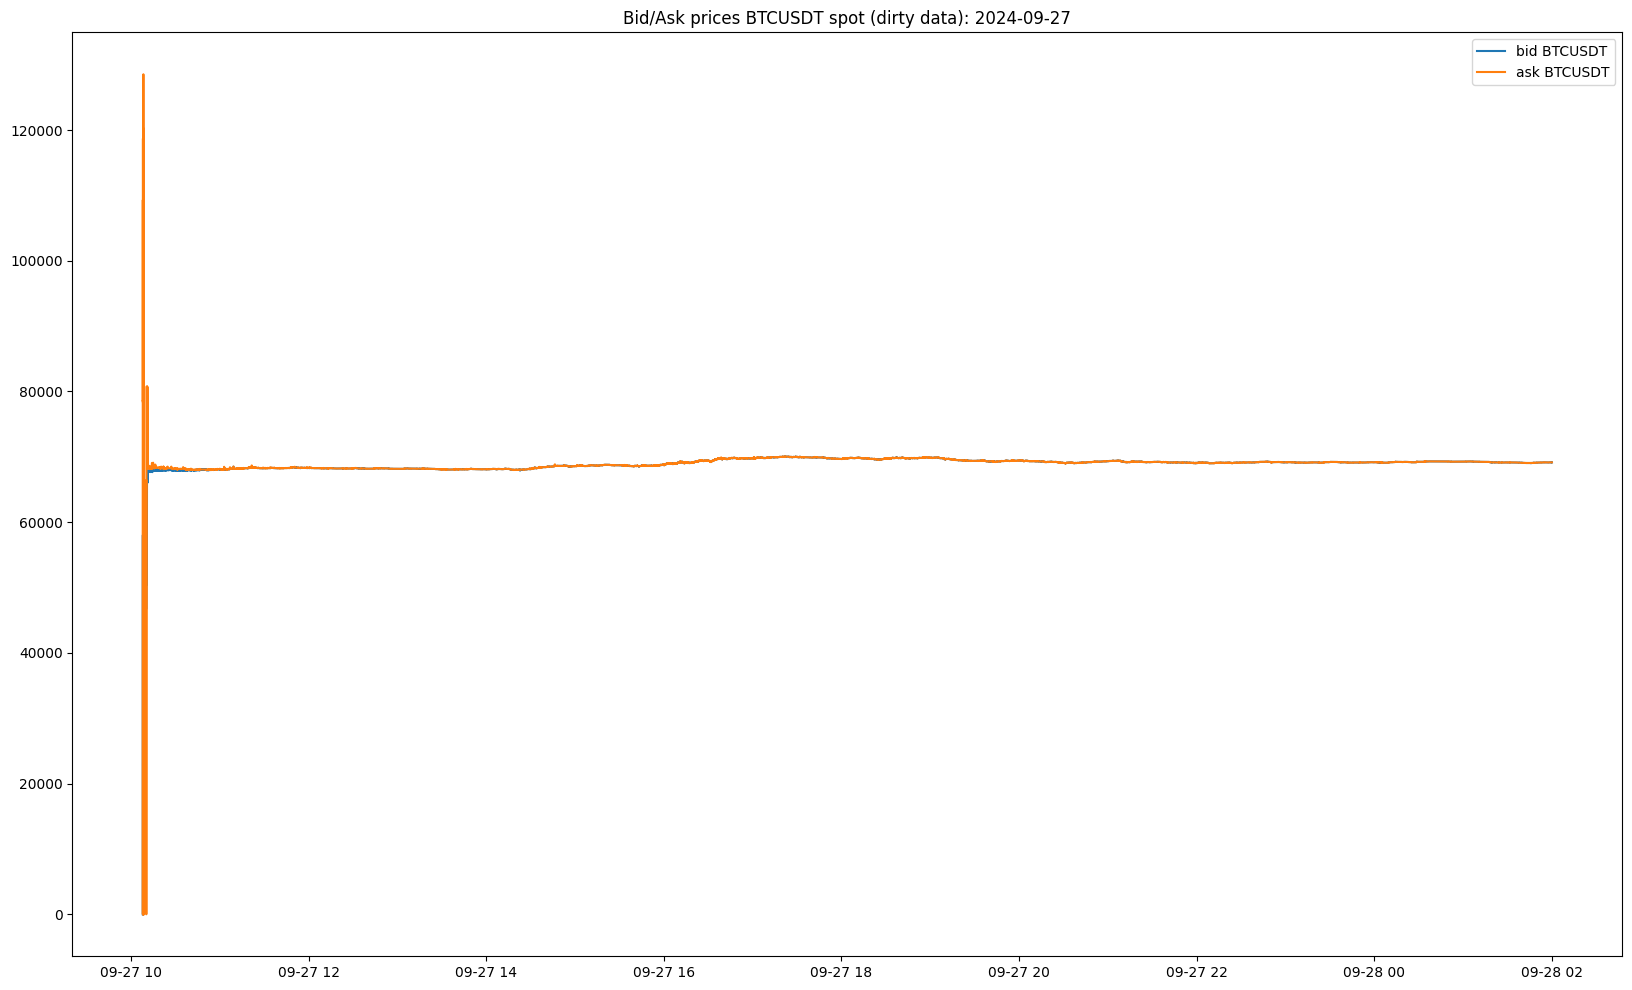

In [13]:
plt.figure(figsize=(20,12))
plt.plot(dateTimeDirty, dirty_data.best_bid_price, label = "bid BTCUSDT")
plt.plot(dateTimeDirty,dirty_data.best_ask_price, label = "ask BTCUSDT")
plt.legend()
plt.title("Bid/Ask prices BTCUSDT spot (dirty data): 2024-09-27")
plt.show()

In [14]:
ti = timestampInTime(dirty_data.transaction_time)
ti

0        2024-09-27 10:08:02.695
1        2024-09-27 10:08:02.697
2        2024-09-27 10:08:02.733
3        2024-09-27 10:08:02.733
4        2024-09-27 10:08:02.733
                   ...          
800767   2024-09-28 01:59:57.365
800768   2024-09-28 01:59:58.220
800769   2024-09-28 01:59:58.220
800770   2024-09-28 01:59:58.316
800771   2024-09-28 01:59:58.316
Name: transaction_time, Length: 800772, dtype: datetime64[ns]

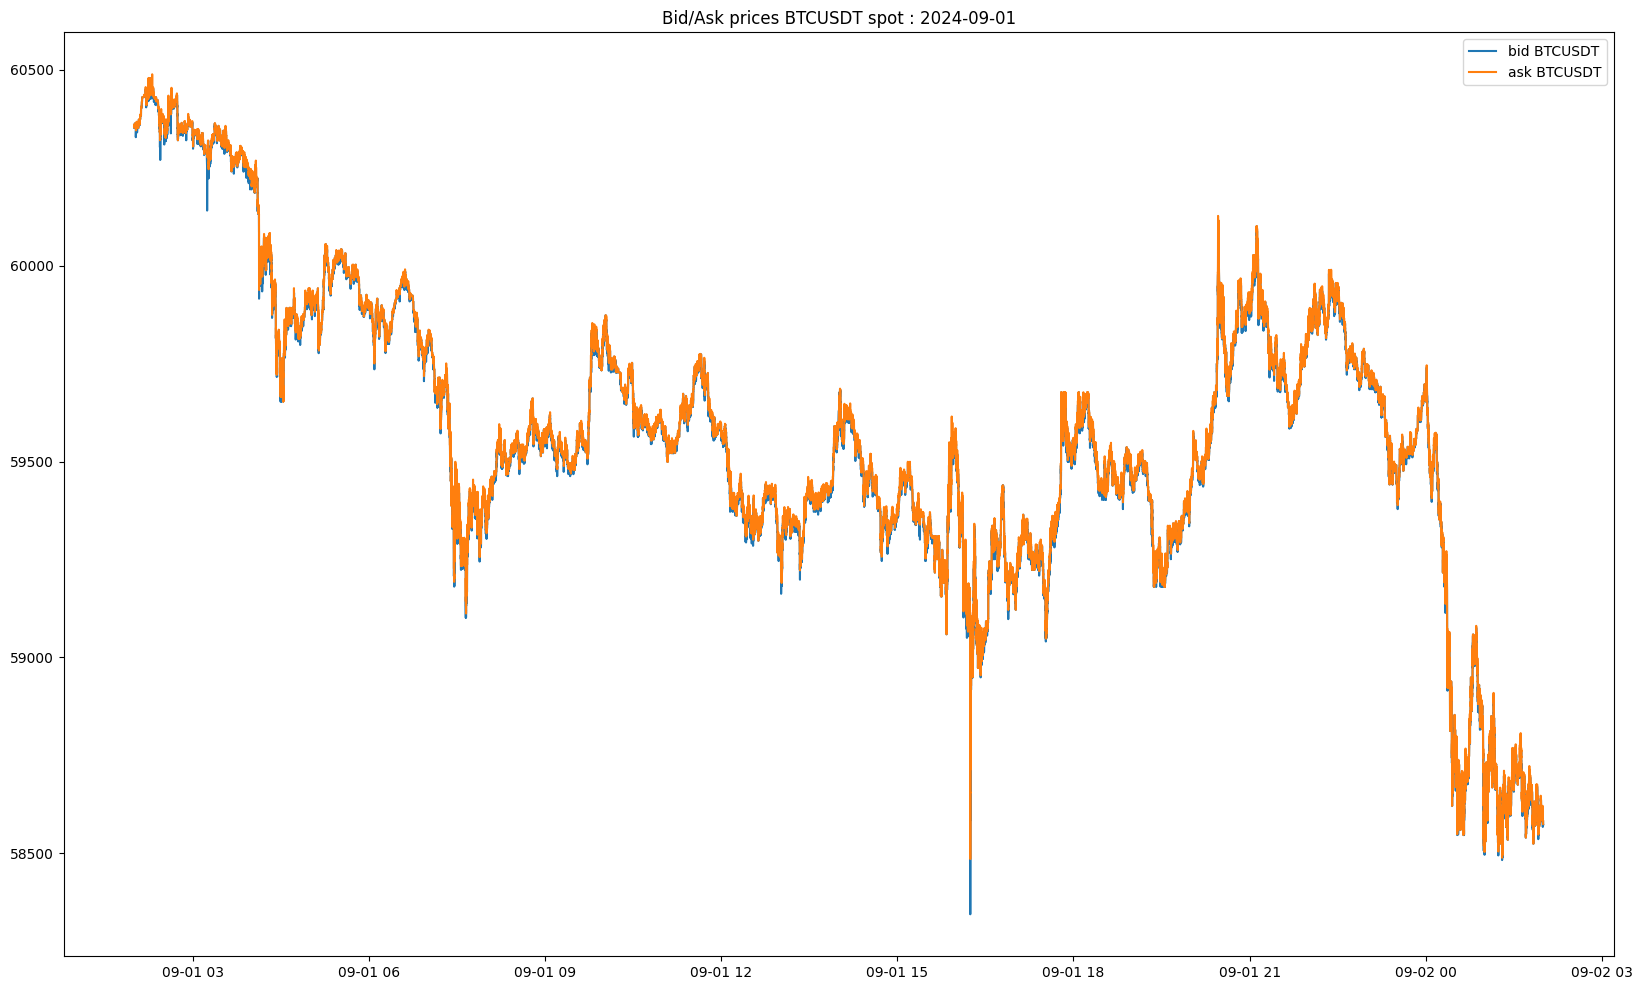

In [15]:
plt.figure(figsize=(20,12))
plt.plot(s_date,data.best_bid_price, label="bid BTCUSDT")
plt.plot(s_date,data.best_ask_price, label="ask BTCUSDT")
plt.legend()
plt.title("Bid/Ask prices BTCUSDT spot : 2024-09-01")
plt.show()

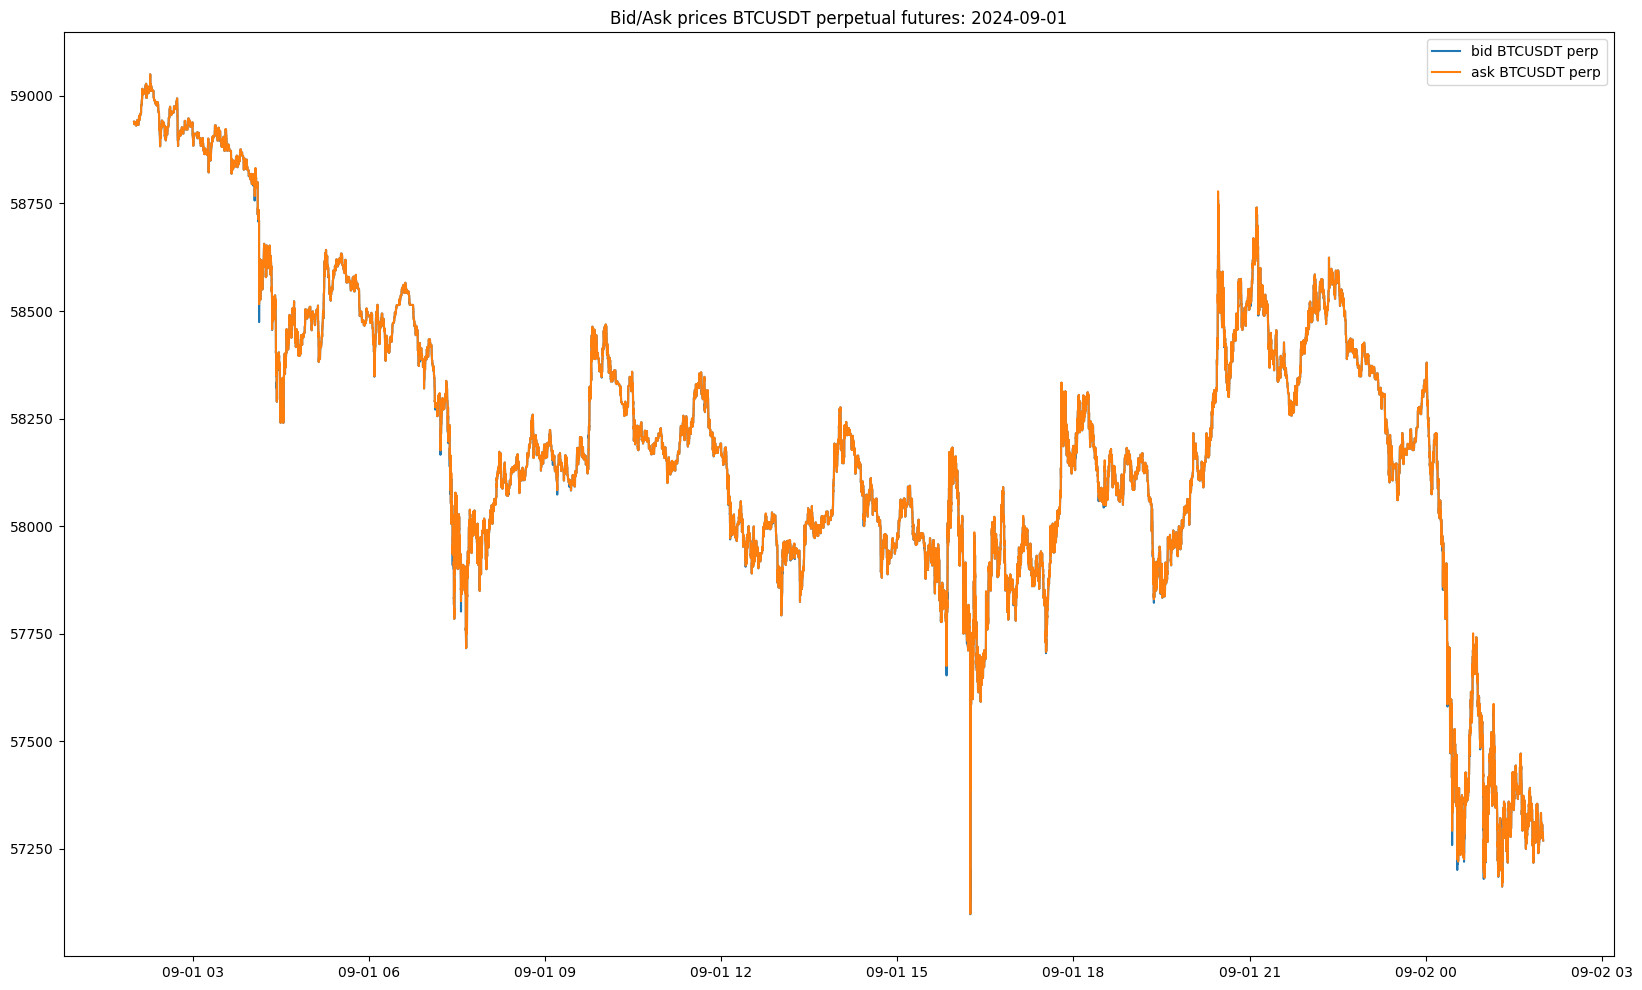

In [16]:
plt.figure(figsize=(20,12))
plt.plot(perp_date,perp.best_bid_price, label="bid BTCUSDT perp")
plt.plot(perp_date,perp.best_ask_price, label="ask BTCUSDT perp")
plt.legend()
plt.title("Bid/Ask prices BTCUSDT perpetual futures: 2024-09-01")
plt.show()

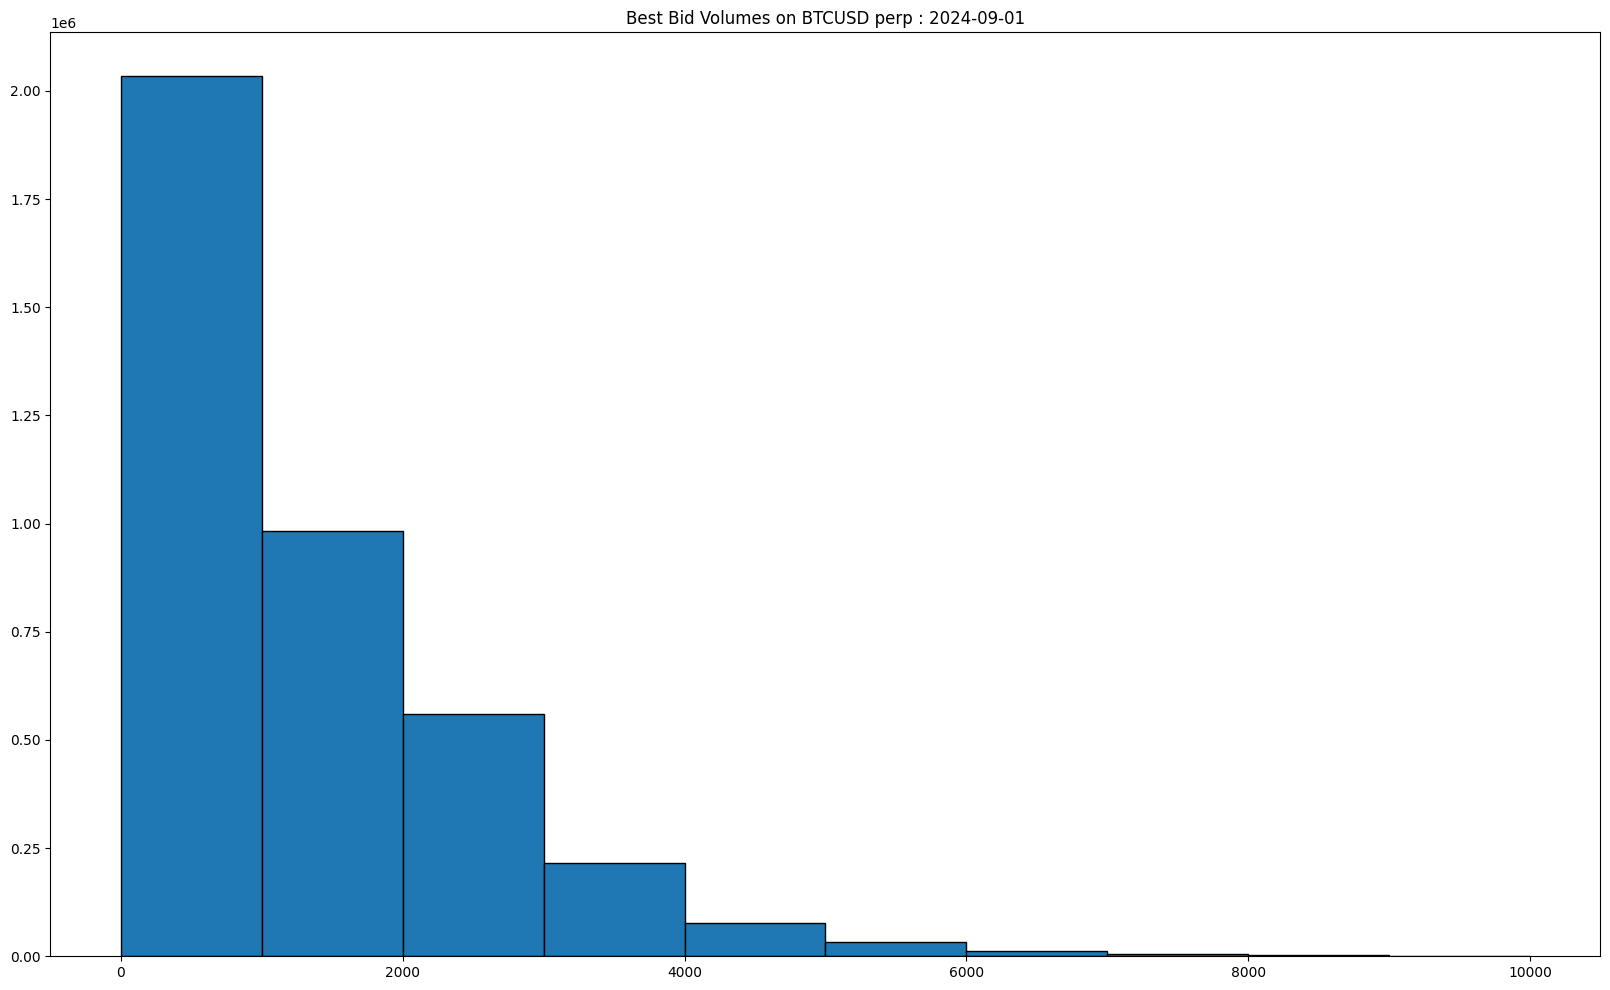

In [17]:
plt.figure(figsize=(20,12))
plt.hist(perp.best_bid_qty,bins=np.arange(0,11000,1000), ec="k")
plt.title("Best Bid Volumes on BTCUSD perp : 2024-09-01")
plt.show()

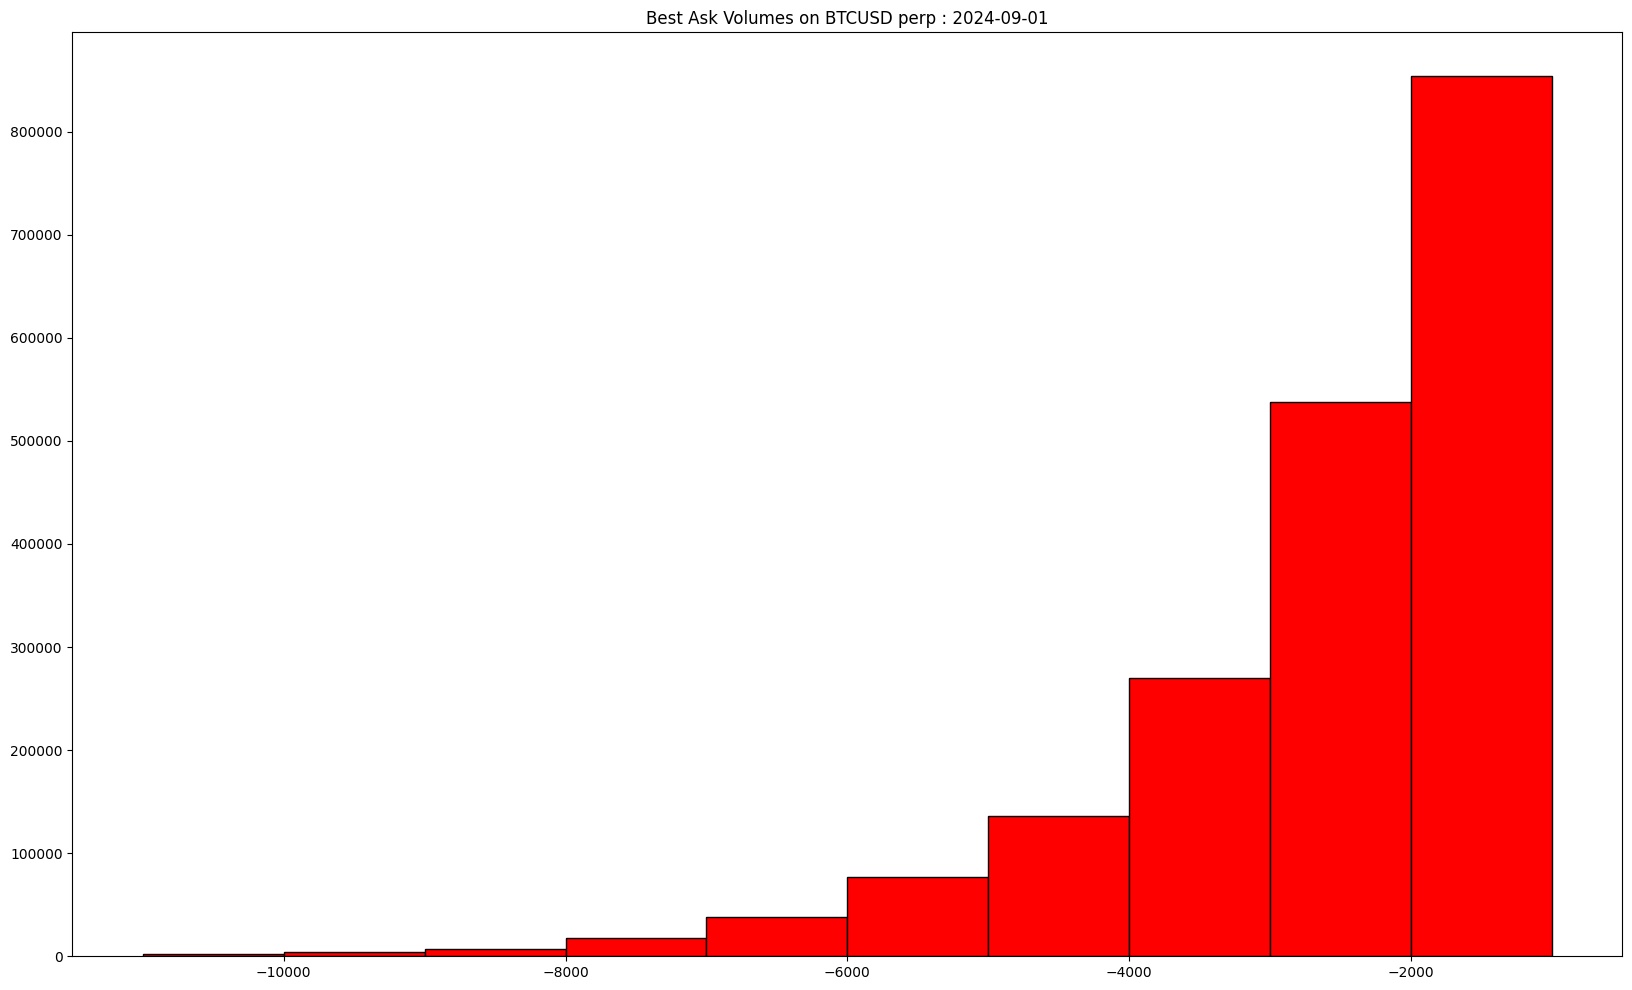

In [25]:
plt.figure(figsize=(20,12))
plt.hist(-perp.best_ask_qty,bins=np.arange(-11000,0,1000), ec="k", color="red")
plt.title("Best Ask Volumes on BTCUSD perp : 2024-09-01")
plt.show()

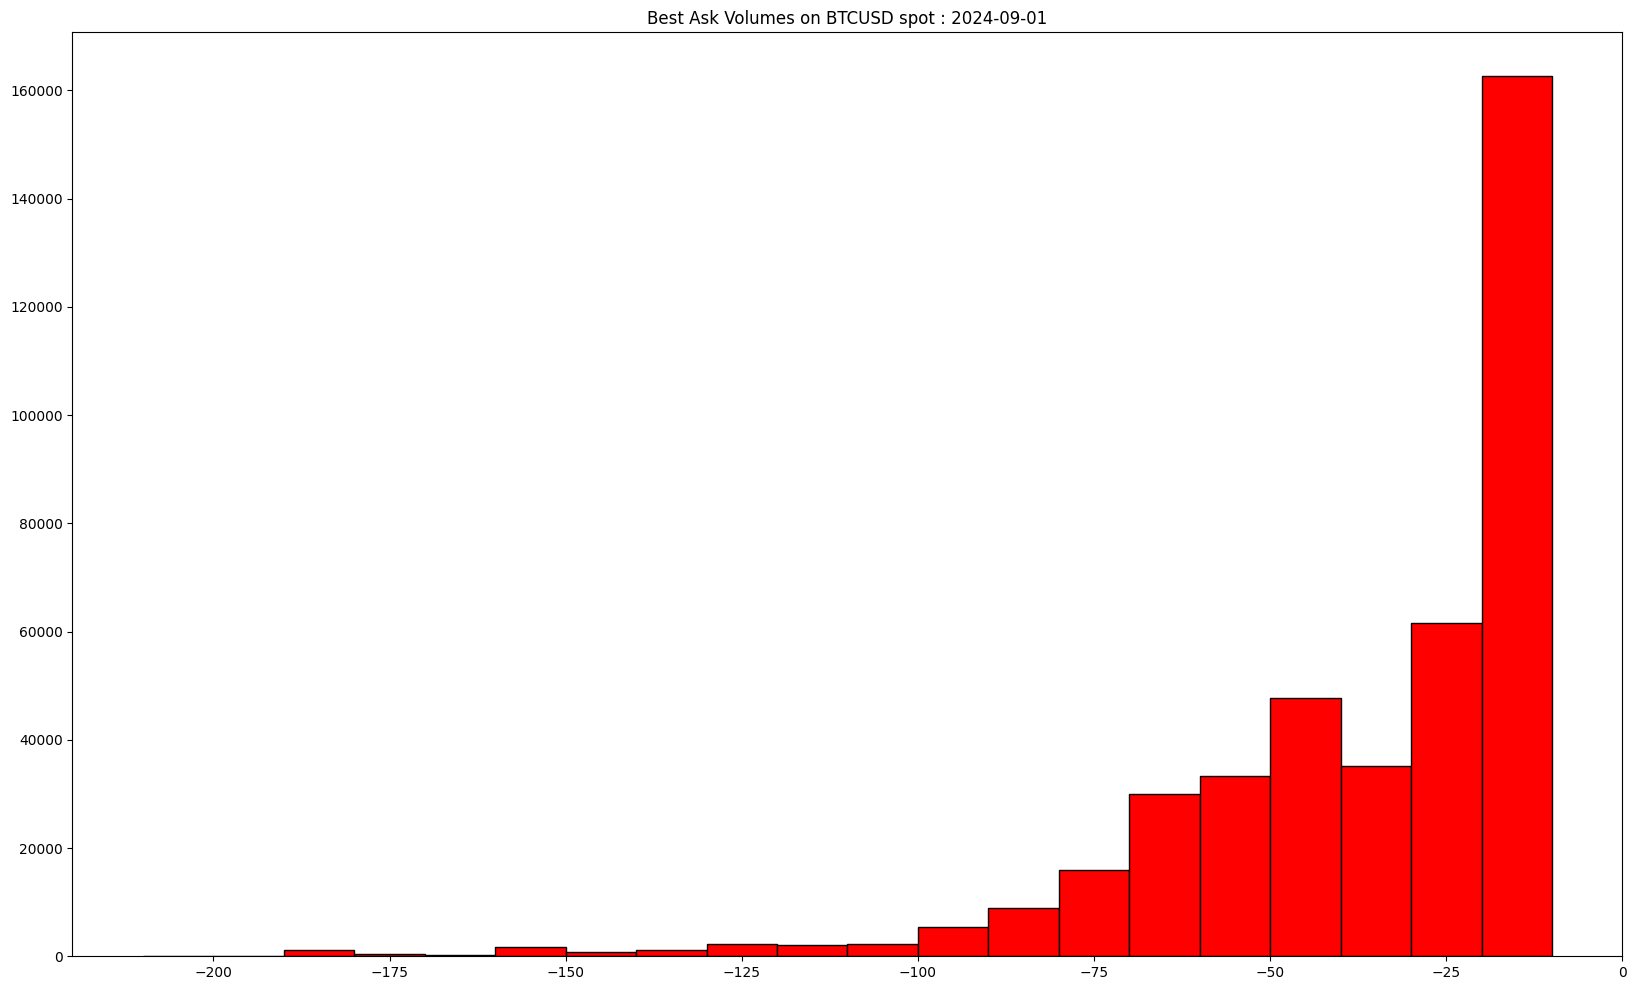

In [26]:
plt.figure(figsize=(20,12))
plt.hist(-data.best_ask_qty,bins=np.arange(-210,0,10), ec="k", color='red')
plt.title("Best Ask Volumes on BTCUSD spot : 2024-09-01")
plt.show()

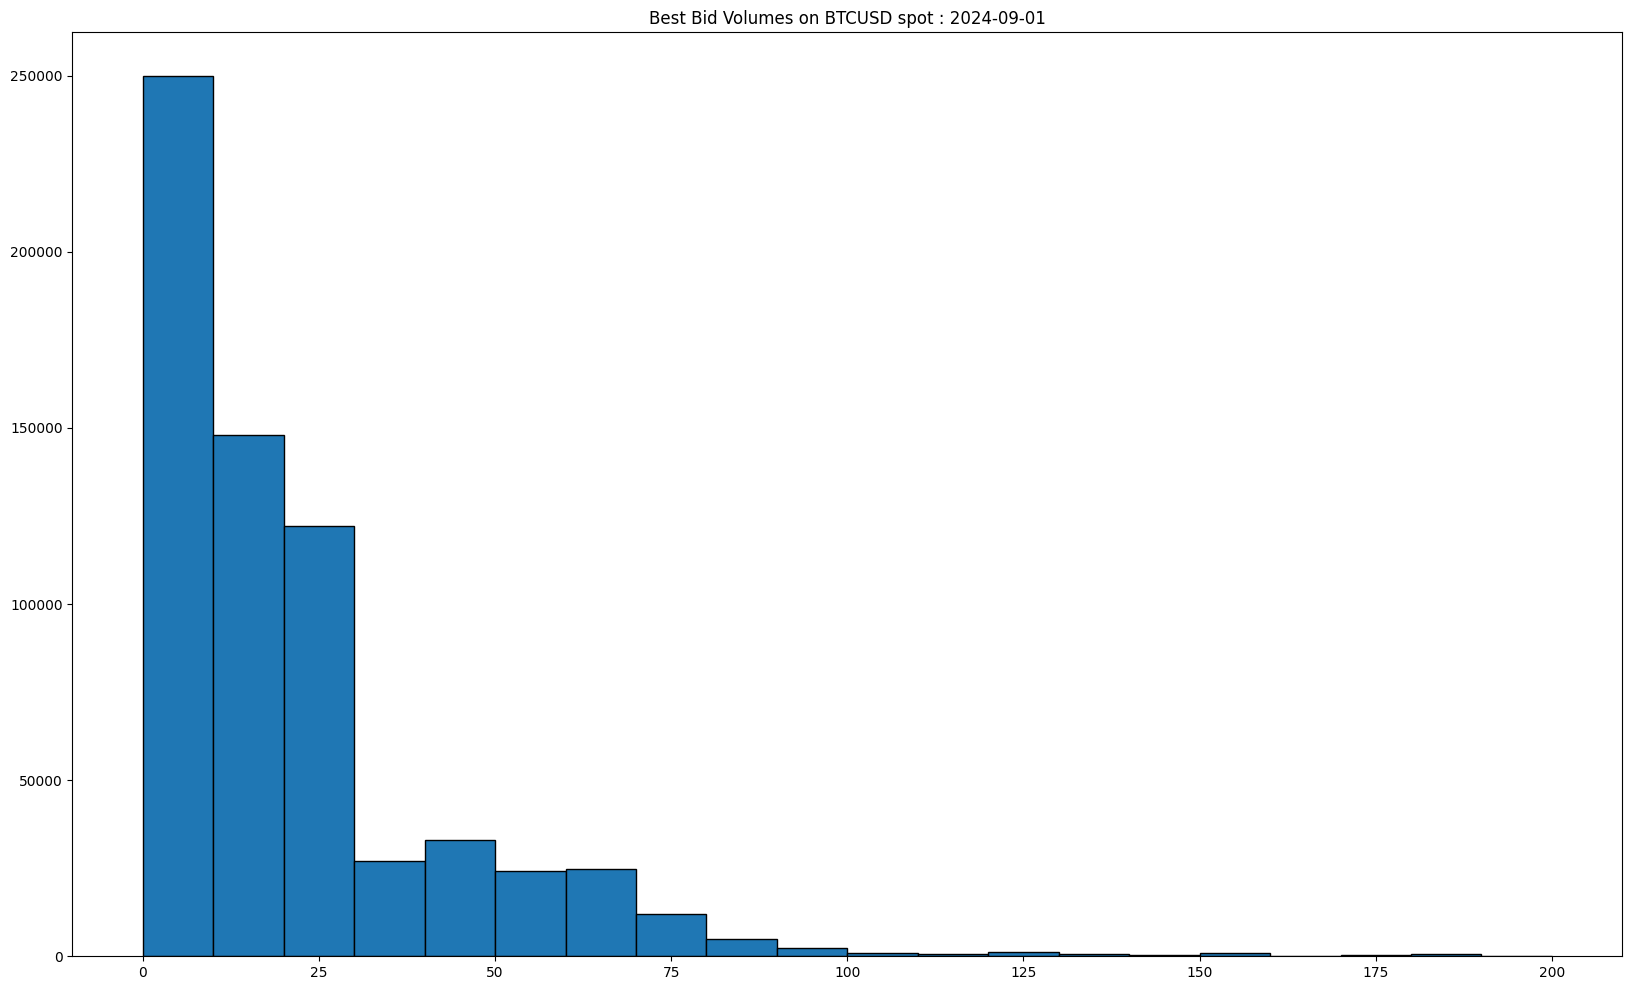

In [20]:
plt.figure(figsize=(20,12))
plt.hist(data.best_bid_qty,bins=np.arange(0,210,10), ec="k")
plt.title("Best Bid Volumes on BTCUSD spot : 2024-09-01")
plt.show()

In [27]:
len(perp)

3924730

In [28]:
len(data)

654359

In [29]:
pd.merge_asof(perp, data, on="transaction_time")


,update_id_x,best_bid_price_x,best_bid_qty_x,best_ask_price_x,best_ask_qty_x,transaction_time,event_time_x,update_id_y,best_bid_price_y,best_bid_qty_y,best_ask_price_y,best_ask_qty_y,event_time_y
0,1022033035827,58939.9,565.0,58940.0,3406.0,1725148800013,1725148800028,NaN,NaN,NaN,NaN,NaN,NaN
1,1022033035850,58939.9,565.0,58940.0,3414.0,1725148800015,1725148800028,NaN,NaN,NaN,NaN,NaN,NaN
2,1022033035862,58939.9,565.0,58940.0,3424.0,1725148800015,1725148800028,NaN,NaN,NaN,NaN,NaN,NaN
3,1022033124897,58939.9,565.0,58940.0,3423.0,1725148800215,1725148800340,NaN,NaN,NaN,NaN,NaN,NaN
4,1022033124963,58939.9,415.0,58940.0,3423.0,1725148800215,1725148800341,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924725,1022651006679,57269.4,22.0,57269.5,2610.0,1725235199567,1725235199575,1.022651e+12,58571.9,4.0,58575.2,56.0,1.725235e+12
3924726,1022651006686,57269.4,22.0,57269.5,2608.0,1725235199567,1725235199578,1.022651e+12,58571.9,4.0,58575.2,56.0,1.725235e+12
3924727,1022651008372,57269.4,22.0,57269.5,2713.0,1725235199787,1725235199796,1.022651e+12,58571.9,4.0,58575.0,73.0,1.725235e+12
3924728,1022651008399,57269.4,23.0,57269.5,2713.0,1725235199795,1725235199806,1.022651e+12,58571.9,4.0,58575.0,73.0,1.725235e+12
